In [1]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imread, imshow,imsave
from skimage.color import rgb2hsv
from PIL import Image
from skimage.util import img_as_ubyte

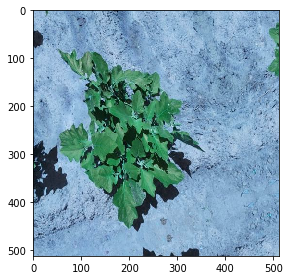

In [2]:
path = "D:\\Final Yr Project\\data\\images\\train\\brinjal\\brinjal_0_560.jpg"
brinjal = cv2.imread(path)
imshow(brinjal)

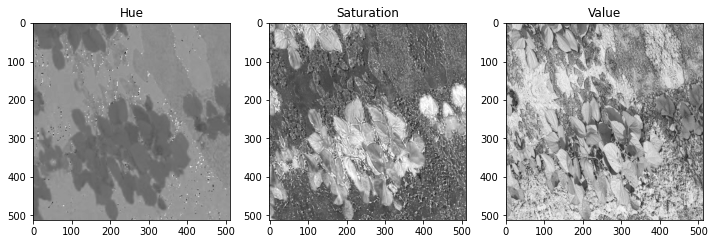

In [19]:
brinjal_hsv = rgb2hsv(brinjal)
fig, ax = plt.subplots(1, 3, figsize=(12,4))
ax[0].imshow(brinjal_hsv[:,:,0], cmap='gray')
ax[0].set_title('Hue')
ax[1].imshow(brinjal_hsv[:,:,1], cmap='gray')
ax[1].set_title('Saturation')
ax[2].imshow(brinjal_hsv[:,:,2], cmap='gray')
ax[2].set_title('Value');

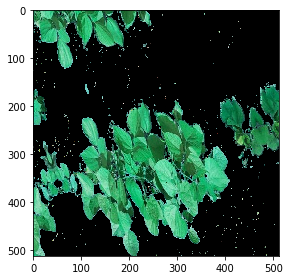

In [20]:
##### refer to hue channel (in the colorbar)
lower_mask = brinjal_hsv[:,:,0] > 0.01

#refer to hue channel (in the colorbar)
upper_mask = brinjal_hsv[:,:,0] < 0.5

#refer to transparency channel (in the colorbar)
saturation_mask = brinjal_hsv[:,:,1] > 0.01
 
mask = upper_mask*lower_mask*saturation_mask
red = brinjal[:,:,0]*mask
green = brinjal[:,:,1]*mask
blue = brinjal[:,:,2]*mask
brinjal_masked = np.dstack((red,green,blue))
imshow(brinjal_masked)

In [21]:
imsave("C:\\Users\\mailp\\Desktop\\test.jpg",brinjal_masked)

In [16]:
import cv2
import numpy as np
image = cv2.imread("C:\\Users\\mailp\\Desktop\\test.jpg")
img = cv2.imread("C:\\Users\\mailp\\Desktop\\test.jpg",cv2.IMREAD_GRAYSCALE)

_,threshold = cv2.threshold(img, 15, 100, cv2.THRESH_BINARY)

cv2.floodFill(threshold, None, seedPoint=(0, 0), newVal=128, loDiff=1, upDiff=1)  # Fill the background in thesh with the value 128 (pixel in the foreground stays 0.

image[threshold == 128] = (0, 0, 255)  # Set all the pixels where thesh=128 to red.

black=np.where((image[:,:,0]==0) & (image[:,:,1]==0) & (image[:,:,2]==0))

#Turn black pixels to white and vice versa
image[black]=(0,0,255)
    
cv2.imshow('image2', image)

# Exiting the window if 'q' is pressed on the keyboard.
if cv2.waitKey(0) & 0xFF == ord('q'): 
    cv2.destroyAllWindows()

In [22]:
# converting to gray scale.
#img2 = cv2.imread("C:\\Users\\mailp\\Desktop\\test.jpg", cv2.IMREAD_COLOR)
img = cv2.imread("C:\\Users\\mailp\\Desktop\\test.jpg", cv2.IMREAD_GRAYSCALE)
brinjal=cv2.imread(path)
print(brinjal.shape)
# Converting image to a binary image 
# (black and white only image).
_,threshold = cv2.threshold(img, 15, 200, cv2.THRESH_BINARY)

# Detecting shapes in image by selecting region 
# with same colors or intensity.
contours,_=cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
   
# Searching through every region selected to 
# find the required polygon.
ans = []
for cnt in contours :
    area = cv2.contourArea(cnt)
    # Shortlisting the regions based on there area.
    if area > 5000: 
        approx = cv2.approxPolyDP(cnt, 0.0005 * cv2.arcLength(cnt, True), True)
        cv2.drawContours(image=brinjal, contours=[approx], contourIdx=-1, color=(75, 75, 255), thickness=2, lineType=cv2.LINE_AA)
cv2.imshow('image2', brinjal)
   
# Exiting the window if 'q' is pressed on the keyboard.
if cv2.waitKey(0) & 0xFF == ord('q'): 
    cv2.destroyAllWindows()

(512, 512, 3)


In [10]:
def func1(path,imgname):
    img2 = cv2.imread(path, cv2.IMREAD_COLOR)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    _,threshold = cv2.threshold(img, 0, 255, 
                                cv2.THRESH_BINARY)
    contours,_=cv2.findContours(threshold, cv2.RETR_TREE,
                                cv2.CHAIN_APPROX_SIMPLE)

    ans = []
    for cnt in contours :
        area = cv2.contourArea(cnt)
        if area > 3000: 
            approx = cv2.approxPolyDP(cnt, 0.0005 * cv2.arcLength(cnt, True), True)
            x,y,w,h = cv2.boundingRect(cnt)
            a1 = ((x+w)/2)/512
            b1 = ((y+h)/2)/512
            c1 = w/512
            d1 = h/512
            ans.append("0 {} {} {} {}\n".format(a1,b1,c1,d1))
    file = open("D:\\Final Yr Project\\data\\labels\\val\\{}.txt".format(imgname),"w")
    file.writelines(ans)
    file.close()

In [8]:
def func(path,imgname):
    crop=cv2.imread(path)
    crop_hsv = rgb2hsv(crop)
    lower_mask = crop_hsv[:,:,0] > 0.09
    #refer to hue channel (in the colorbar)
    upper_mask = crop_hsv[:,:,0] < 0.45
    #refer to transparency channel (in the colorbar)
    saturation_mask = crop_hsv[:,:,1] > 0.4

    mask = upper_mask*lower_mask*saturation_mask
    red = crop[:,:,0]*mask
    green = crop[:,:,1]*mask
    blue = crop[:,:,2]*mask
    crop_masked = np.dstack((red,green,blue))
    imsave("D:\\Final Yr Project\\data\\test.jpg",crop_masked)
    func1("D:\\Final Yr Project\\data\\test.jpg",imgname)

In [11]:
folder_dir = "D:\\Final Yr Project\\data\\images\\val\\brinjal"
for images in os.listdir(folder_dir):
    if (images.endswith(".jpg")):
        path = "D:\\Final Yr Project\\data\\images\\val\\brinjal\\"+images
        func(path,images[:-4])